In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_moon, solar_system_ephemeris, get_body, SkyCoord
import pytz

# observer's location (Garber Nature Center in Lewisburg, Ohio)
lewisburg = EarthLocation(lat=39.935, lon=-84.451, height=250)  # Latitude, Longitude, Height in meters

# Define the time range, starting in UTC
start_time = Time('2025-04-06 00:00:00')  # 12 AM
end_time = Time('2025-04-06 02:00:00')    # 2 AM

# Create an array of Time objects for each minute in the range
times = Time(np.arange(start_time.jd, end_time.jd, 1/1440), format='jd')  # 1-minute intervals

# Set up the Altitude-Azimuth frame
altaz_frame = AltAz(obstime=times, location=lewisburg)

# Get the positions of several bright objects
with solar_system_ephemeris.set('builtin'):
    moon = get_moon(times).transform_to(altaz_frame)
    jupiter = get_body('jupiter', times).transform_to(altaz_frame)
    mars = get_body('mars', times).transform_to(altaz_frame)
    arcturus = SkyCoord.from_name("Arcturus").transform_to(altaz_frame)
    sirius = SkyCoord.from_name("Sirius").transform_to(altaz_frame)
    betelgeuse = SkyCoord.from_name("Betelgeuse").transform_to(altaz_frame)

# Convert times to local time (8pm-10pm - Eastern Daylight Time)
local_times = times.to_datetime()  # Convert to datetime objects
local_times = [t.replace(tzinfo=pytz.utc).astimezone(pytz.timezone('America/New_York')) for t in local_times]

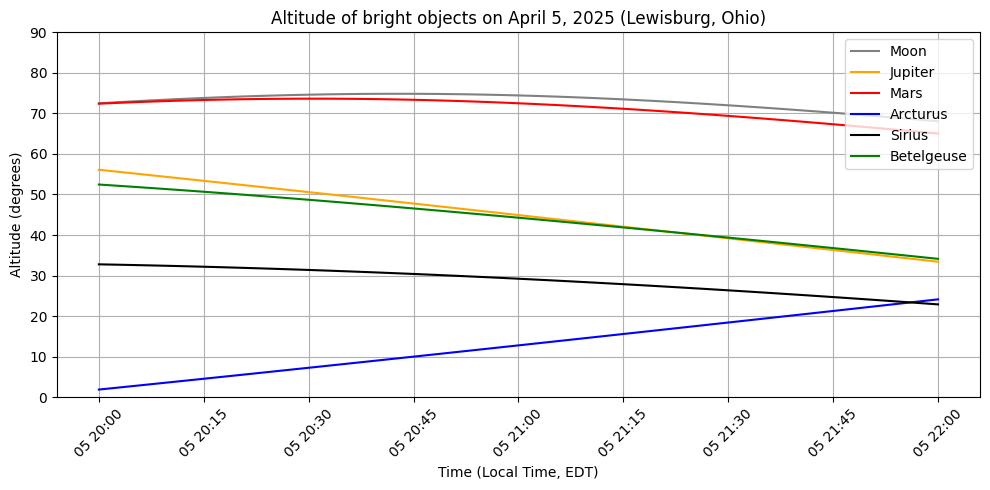

In [3]:
# Plotting - altitude
plt.figure(figsize=(10, 5))
plt.plot(local_times, moon.alt, label='Moon', color='gray')
plt.plot(local_times, jupiter.alt, label='Jupiter', color='orange')
plt.plot(local_times, mars.alt, label='Mars', color='red')
plt.plot(local_times, arcturus.alt, label='Arcturus', color='blue')
plt.plot(local_times, sirius.alt, label='Sirius', color='black')
plt.plot(local_times, betelgeuse.alt, label='Betelgeuse', color='green')

# Format the plot
plt.title('Altitude of bright objects on April 5, 2025 (Lewisburg, Ohio)')
plt.xlabel('Time (Local Time, EDT)')
plt.ylabel('Altitude (degrees)')
plt.xticks(rotation=45)
plt.ylim(0, 90)  # Altitude ranges from 0 to 90 degrees
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

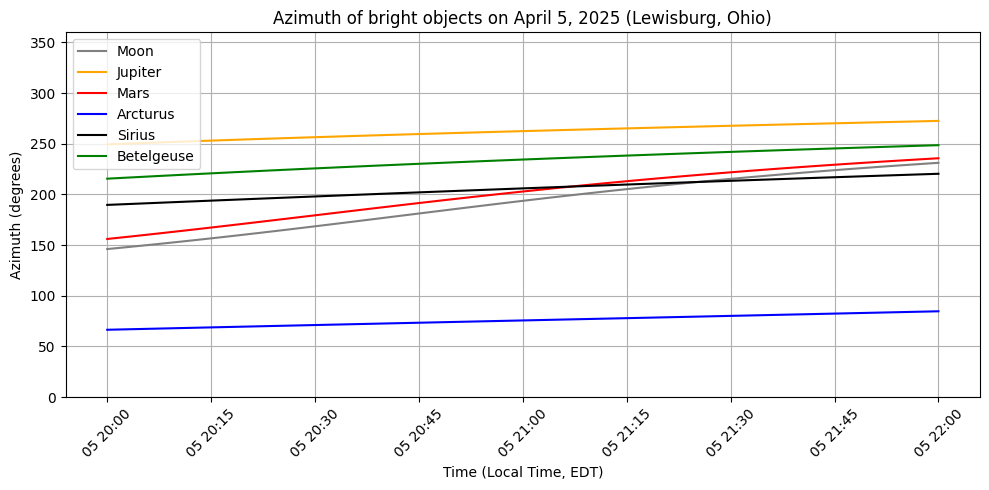

In [4]:
# Plotting - azimuth
plt.figure(figsize=(10, 5))
plt.plot(local_times, moon.az, label='Moon', color='gray')
plt.plot(local_times, jupiter.az, label='Jupiter', color='orange')
plt.plot(local_times, mars.az, label='Mars', color='red')
plt.plot(local_times, arcturus.az, label='Arcturus', color='blue')
plt.plot(local_times, sirius.az, label='Sirius', color='black')
plt.plot(local_times, betelgeuse.az, label='Betelgeuse', color='green')

# Format the plot
plt.title('Azimuth of bright objects on April 5, 2025 (Lewisburg, Ohio)')
plt.xlabel('Time (Local Time, EDT)')
plt.ylabel('Azimuth (degrees)')
plt.xticks(rotation=45)
plt.ylim(0, 360)  # Azimuth ranges from 0 to 90 degrees
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()